In [1]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [2]:
train_data = TimeSeriesDataFrame.from_path( 
     "https://autogluon.s3.amazonaws.com/datasets/timeseries/australian_electricity_subset/train.csv", 
     id_column="item_id", 
     timestamp_column="timestamp", 
)
train_data

target
item_id timestamp                       
T000000 2013-03-10 00:00:00  5207.959961
        2013-03-10 00:30:00  5002.275879
        2013-03-10 01:00:00  4747.569824
        2013-03-10 01:30:00  4544.880859
        2013-03-10 02:00:00  4425.952148
...                                  ...
T000004 2015-02-27 21:30:00   368.948792
        2015-02-27 22:00:00   346.332764
        2015-02-27 22:30:00   327.962677
        2015-02-27 23:00:00   307.481934
        2015-02-27 23:30:00   291.532776

[172800 rows x 1 columns]

In [9]:
train_data.to_data_frame().reset_index()

,item_id,timestamp,target
0,T000000,2013-03-10 00:00:00,5207.959961
1,T000000,2013-03-10 00:30:00,5002.275879
2,T000000,2013-03-10 01:00:00,4747.569824
3,T000000,2013-03-10 01:30:00,4544.880859
4,T000000,2013-03-10 02:00:00,4425.952148
...,...,...,...
172795,T000004,2015-02-27 21:30:00,368.948792
172796,T000004,2015-02-27 22:00:00,346.332764
172797,T000004,2015-02-27 22:30:00,327.962677
172798,T000004,2015-02-27 23:00:00,307.481934


In [10]:
train_data.to_data_frame().reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172800 entries, 0 to 172799
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   item_id    172800 non-null  object        
 1   timestamp  172800 non-null  datetime64[ns]
 2   target     172800 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.0+ MB


In [18]:
timestamp = train_data.to_data_frame().reset_index()['timestamp']
timestamp.nunique(), timestamp.min(), timestamp.max()

(36096, Timestamp('2013-03-10 00:00:00'), Timestamp('2015-03-31 23:30:00'))

In [28]:
item_id = train_data.to_data_frame().reset_index()['item_id']
item_id.value_counts()

item_id
T000000    34560
T000001    34560
T000002    34560
T000003    34560
T000004    34560
Name: count, dtype: int64

In [3]:
predictor = TimeSeriesPredictor(prediction_length=48).fit(train_data, presets="bolt_base")
predictor

Beginning AutoGluon training...
AutoGluon will save models to '/Users/YShimada-MBP16/Documents/Code_Github/DL_for_ImageData_and_Finetuning/TimeSeries_WM_simple/code/AutogluonModels/ag-20250226_025742'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:22:00 PST 2025; root:xnu-11215.81.4~3/RELEASE_X86_64
CPU Count:          16
GPU Count:          0
Memory Avail:       12.88 GB / 32.00 GB (40.3%)
Disk Space Avail:   1436.92 GB / 1863.39 GB (77.1%)
Setting presets to: bolt_base

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'bolt_base'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 48,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': Fal

In [11]:
predictions = predictor.predict(train_data)
predictions

Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_base]


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/821M [00:00<?, ?B/s]

mean          0.1          0.2  \
item_id timestamp                                                    
T000000 2015-02-28 00:00:00  5353.018555  5166.324707  5234.095215   
        2015-02-28 00:30:00  5125.433594  4942.870605  5007.982910   
        2015-02-28 01:00:00  4861.613281  4696.759766  4753.370117   
        2015-02-28 01:30:00  4663.333984  4515.384766  4564.424805   
        2015-02-28 02:00:00  4525.338379  4383.908203  4428.694336   
...                                  ...          ...          ...   
T000004 2015-02-28 21:30:00   355.918884   323.028198   335.212830   
        2015-02-28 22:00:00   332.455566   301.766754   313.118439   
        2015-02-28 22:30:00   311.128113   282.550415   292.758728   
        2015-02-28 23:00:00   293.524597   266.613251   276.239685   
        2015-02-28 23:30:00   280.317871   255.334824   263.751526   

                                     0.3          0.4          0.5  \
item_id timestamp                                                    
T000000 2015-02-28 00:00:00  5279.525391  5316.592285  5353.018555   
        2015-02-28 00:30:00  5053.404297  5088.641113  5125.433594   
        2015-02-28 01:00:00  4793.965332  4827.861328  4861.613281   
        2015-02-28 01:30:00  4602.530762  4631.382324  4663.333984   
        2015-02-28 02:00:00  4465.790527  4496.222656  4525.338379   
...                                  ...          ...          ...   
T000004 2015-02-28 21:30:00   343.315674   350.024231   355.918884   
        2015-02-28 22:00:00   320.532562   326.792328   332.455566   
        2015-02-28 22:30:00   299.803345   305.608704   311.128113   
        2015-02-28 23:00:00   282.733063   288.386780   293.524597   
        2015-02-28 23:30:00   269.833252   275.223480   280.317871   

                                     0.6          0.7          0.8  \
item_id timestamp                                                    
T000000 2015-02-28 00:00:00  5386.550293  5421.673828  5463.125977   
        2015-02-28 00:30:00  5161.971191  5197.649414  5243.510742   
        2015-02-28 01:00:00  4894.874512  4929.119141  4973.809570   
        2015-02-28 01:30:00  4693.496094  4724.651367  4764.496582   
        2015-02-28 02:00:00  4553.847656  4584.305664  4620.258789   
...                                  ...          ...          ...   
T000004 2015-02-28 21:30:00   361.456940   367.881165   375.626587   
        2015-02-28 22:00:00   338.088928   344.221283   351.996765   
        2015-02-28 22:30:00   316.755371   322.802063   330.706726   
        2015-02-28 23:00:00   298.901428   304.892334   312.444214   
        2015-02-28 23:30:00   285.370789   291.183685   299.199310   

                                     0.9  
item_id timestamp                         
T000000 2015-02-28 00:00:00  5538.159668  
        2015-02-28 00:30:00  5310.451660  
        2015-02-28 01:00:00  5043.156250  
        2015-02-28 01:30:00  4830.905762  
        2015-02-28 02:00:00  4685.882812  
...                                  ...  
T000004 2015-02-28 21:30:00   389.085602  
        2015-02-28 22:00:00   365.290680  
        2015-02-28 22:30:00   343.697083  
        2015-02-28 23:00:00   326.051666  
        2015-02-28 23:30:00   312.911957  

[240 rows x 10 columns]

In [19]:
predictions.to_data_frame().reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   item_id    240 non-null    object        
 1   timestamp  240 non-null    datetime64[ns]
 2   mean       240 non-null    float32       
 3   0.1        240 non-null    float32       
 4   0.2        240 non-null    float32       
 5   0.3        240 non-null    float32       
 6   0.4        240 non-null    float32       
 7   0.5        240 non-null    float32       
 8   0.6        240 non-null    float32       
 9   0.7        240 non-null    float32       
 10  0.8        240 non-null    float32       
 11  0.9        240 non-null    float32       
dtypes: datetime64[ns](1), float32(10), object(1)
memory usage: 13.2+ KB


In [29]:
predictions.to_data_frame().reset_index()['item_id'].value_counts()

item_id
T000000    48
T000001    48
T000002    48
T000003    48
T000004    48
Name: count, dtype: int64

In [21]:
timestamp.nunique(), timestamp.min(), timestamp.max()

(36096, Timestamp('2013-03-10 00:00:00'), Timestamp('2015-03-31 23:30:00'))

In [20]:
timestamp_pred = predictions.to_data_frame().reset_index()['timestamp']
timestamp_pred.nunique(), timestamp_pred.min(), timestamp_pred.max()

(144, Timestamp('2015-02-28 00:00:00'), Timestamp('2015-04-01 23:30:00'))

In [22]:
144/48

3.0

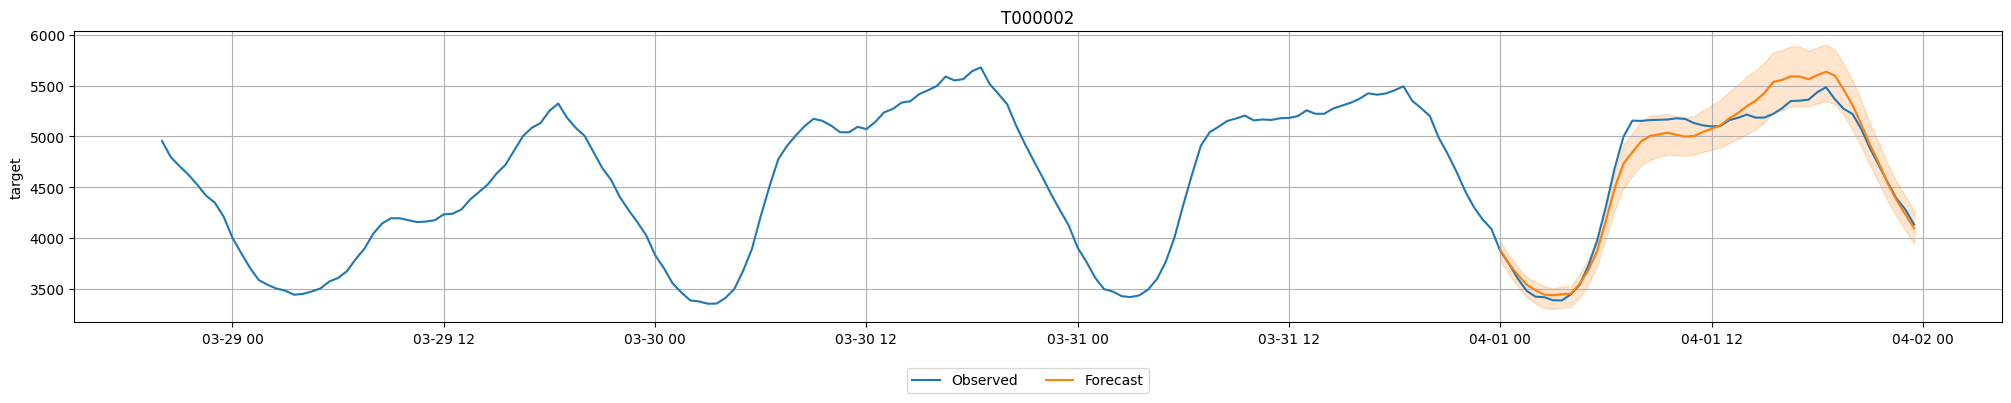

In [24]:
test_data = TimeSeriesDataFrame.from_path( 
     "https://autogluon.s3.amazonaws.com/datasets/timeseries/australian_electricity_subset/test.csv", 
     id_column="item_id", 
     timestamp_column="timestamp", )

predictor.plot(test_data,predictions,max_history_length=200,item_ids=["T000002"])

In [26]:
test_data
timestamp_test = test_data.to_data_frame().reset_index()['timestamp']
timestamp_test.nunique(), timestamp_test.min(), timestamp_test.max()

(36144, Timestamp('2013-03-10 00:00:00'), Timestamp('2015-04-01 23:30:00'))